<div style="text-align: right">INFO 6106 Machine Learning Final Project</div>
<div style="text-align: right">Dino Konstantopoulos 5 April 2025</div>

# Lake Effect precipitation
[Lake-effect](https://en.wikipedia.org/wiki/Lake-effect_snow) is the weather trend that happens when cold air moves across big Lakes like the US Great Lakes, warms up, evaporates as clouds, and produces abundant precipitation. Lake Michigan for example often produces its own weather ecosystem, either producing unexpected rain or wiping out entire advected cloud fronts. 

The city of Chicago can get hit with loads of snow from Lake effects and needs time to mobilize snow plowing crews. Traditional meteorological studies utilize fluid dynamics to model future weather and make predictions. 

For your final project, you will train a hybrid Neural Network connecting a Convolutional neural network and a Long Short-Term Memory recurrent network trained on a fusion of historical data from above the atmosphere (satellite radar data of cloud cover) and data from below (ground meteorology station data), to predict Lake Effect precipitation on cities on the shore of Lake Michigan. 

Traverse City is a good place to start. It is a coastal Lake Michigan city that receives a lot of Lake Effect precipitation.

Do train with an emphasis on predicting severe weather events, which are rare, underrepresented labels in the training dataset, and on increasing the prediction range from a typical short-term of 24 hours to a midrange of 3 days. 

Can you predict severe precipitation events with accuracies above 70% (for the rare label!) and 3 days in advance?

Do models trained for a specific area of Lake Michigan generalize well for other areas of the lake through geographical transfer learning and a small amount of retraining of the last layers in the network?

At a time of novel and severe weather events caused by global warming, can we adapt Weather ML models trained in one geographical area, where much meteorological data is available, to other areas with similar dynamics where data is not as readily available?

## 1. Data Introduction

### 1.1 Before Get Started

I used to store Weather data on a JupyterHub server: `https://derpyhusky.dog/`

With the following credentials:
```html
Username: info6106student
Password: !nfo_$hsare
```
 But it was too expensive to maintain, so not working anymore :-(
 
All this is GOES satellite data though, so it's publically available from either NOAA or NASA.
 
### 1.2 File Location

Located in `~/DATA` folder upon logging into the server, there are 2 `.csv` files and 2 folders. 

<img src="https://i.imgur.com/IFzSsX4.png" alt="image" width="75%">

1. `Annually_Combined_CSV`: This folder contains GOES satellite imagery data and meteorology data from local weather station in **Traverse City, Michigan** aggregated for each October (Fall) to the next March (Spring). (e.g.: **Fall 2015** to **Spring 2016** refers to **October 2015** to **March 2016**.) 

2. `GOES_Raw_Images`: This folder contains the GOES satellite imagery data in `.png` format, which is being processed by the official toolkit for result validation.

3. `2006Fall_2017Spring_GOES_meteo_combined.csv`: This is a `.csv` file which contains GOES satellite imagery data and meteorology data from local weather station in **Traverse City, Michigan** from `October 1, 2006 0:00` to `March 31, 2017 23:00`.

4. `lat_lon_1D_labels_for_plotting.csv`: This is a `.csv` file which contains a list of (longitude, latitude) points which represent the location of pixels in Lake Michigan area.

I'll upload the last two files on Canvas.

Next, we will delve into the details of the dataset.

#### 1.2.1 GOES Satellite Imagery and Meteorology Combined Dataset

There is a `.csv` file named `2006Fall_2017Spring_GOES_meteo_combined.csv`. It is roughtly **4.76 GB**, so please make sure you:

1. Have sufficient physical RAM that is equal or over 16 GB;

2. On Windows, turn on paging file. Tutorial can be found at

> https://www.howtogeek.com/126430/what-is-the-windows-page-file/

3. On Linux, turn on swap. Tutorial can be found at

> https://help.ubuntu.com/community/SwapFaq

By doing so, it will help you to get through the experiment without experiencing system hanging that can be both annoying and time-consuming.

But, if you _really_ do not have the needed disk space or RAM for the computation, then in the folder `~/DATA/Hourly_Combined_CSV`, you will find **11** hourly combined data files.

#### 1.2.2 Lake Michigan Area Longitude & Latitude Labels

In `lat_long_1D_labels_for_plotting.csv`, you will find a list of (longitude, latitude) points which represent the location of pixels in Lake Michigan area. This dataset can be used to construct a visualization for 1-D GOES satellite imagery data.

### 1.3 Data Description

This dataset contains hourly indexed GOES satellite imagery data and meteorology data, from `October 1, 2006 0:00` to `March 31, 2017 23:00`.


| Column Name           | Data Category     | Data Type                  | Description                                                  |
| :--------------------- | :-----------------: | :--------------------------: | :------------------------------------------------------------ |
| Date_UTC              | Timestamp         | `<String>`                 | The date of the data in the row in UTC timezone. This timezone is used by GOES satellites and the file naming follows the same convention. |
| Time_UTC              | Timestamp         | `<String>`                 | The time of the data in the row in UTC timezone. This timezone is used by GOES satellites and the file naming follows the same convention. |
| Date_CST              | Timestamp         | `<String>`                 | The date of the data in the row in UTC timezone. This timezone is used by weather station while collecting meteorology data. |
| Time_CST              | Timestamp         | `<String>`                 | The time of the data in the row in UTC timezone. This timezone is used by weather station while collecting meteorology data. |
| File_name_for_1D_lake | I/O               | `<String>`                 | The corresponding raw data file where the GOES satellite imagery data was extracted. Files can be found on server***. |
| File_name_for_2D_lake | I/O               | `<String>`                 | The corresponding processed data file where the GOES satellite imagery data was extracted. Files can be found on server***. |
| Lake_data_1D          | Satellite Imagery | `Array[<Float>]`           | 1-D array of floating point numbers which represent the flattened cloud pixel intensity of Lake Michigan area. The array has a length of `3,599`. |
| Lake_data_2D          | Satellite Imagery | `Array[Array[<Float>], …]` | 2-D array of floating point numbers which represent the cloud pixel intensity of Lake Michigan area. The structure of the array is: [[col 1], [col 2], ..], data can be used to reconstruct a 106 x 79 matrix. |
| Temp (F)              | Meteorology       | `<Integer>`                | Temperature (°F Dry Bulb)                                    |
| RH (%)                | Meteorology       | `<Float>`                  | Relative Humidity (%)                                        |
| Dewpt (F)             | Meteorology       | `<Integer>`                | Dew Point Temperature (°F)                                   |
| Wind Spd (mph)        | Meteorology       | `<Float>`                  | Wind Speed (mph)                                             |
| Wind Direction (deg)  | Meteorology       | `<Float>`                  | Wind Direction (degrees, measured every 10 degrees)          |
| Peak Wind Gust(mph)   | Meteorology       | `<Float>`                  | Wind Gust (mph)                                              |
| Low Cloud Ht (ft)     | Meteorology       | `<Float>`                  | Cloud Height—Lower Level of Cloud (feet)                     |
| Med Cloud Ht (ft)     | Meteorology       | `<Float>`                  | Cloud Height—Med Level of Cloud (feet)                       |
| High Cloud Ht (ft)    | Meteorology       | `<Float>`                  | Cloud Height—Upper Level of Cloud (feet)                     |
| Visibility (mi)       | Meteorology       | `<Float>`                  | Visibility (miles)                                           |
| Atm Press (hPa)       | Meteorology       | `<Float>`                  | Atmospheric Pressure (hPa, hecto-Pascals)                    |
| Sea Lev Press (hPa)   | Meteorology       | `<Float>`                  | Sea Level Pressure (hPa, hecto-Pascals)                      |
| Altimeter (hPa)       | Meteorology       | `<Float>`                  | Altimeter (hPa, hecto-Pascals)                               |
| Precip (in)           | Meteorology       | `<Float>`                  | Precipitation (inches)                                       |
| Wind Chill (F)        | Meteorology       | `<Integer>`                | Wind Chill (°F)                                              |
| Heat Index (F)        | Meteorology       | `<Integer>`                | Heat Index (°F)                                              |

**Non-numeric labels in meteorology data:**

> Missing values are indicated by "M" and "m". When observations note specific values as missing, "M" is used. The "m" is used when there is a lack of information from the observation.

`Lake_data_1D`: 

Each value in the array corresponds to a pixel within the Lake Michigan area. The longitude and latitude values of these pixels can be found in `2006Fall_2017Spring_GOES_meteo_combined.csv`. There are 3,599 data points which covers the Lake Michigan area.

Lake_data_2D: 

The 2-D array can be utilized to create a rectangular region that encompasses the Lake Michigan area. The area covers latitudes ranging from 41.78 to 45.98 with an increment of 0.04, and longitudes ranging from -87.90 to -84.78 with an increment of 0.04.

## 2. Data Visualization

The following section provides a simple function that can help you visualize the GOES satellite imagery data. An example usage is provided to help you understand how to use the function in your particular use case.

In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install plotly
# !pip install numpy

In [2]:
import os
import pandas as pd
import numpy as np
import ast

`Inputs`:

1. lat, `Array[<float>]`
    
    This is a list of floating point numbers that contains the necessary index values for latitude.
    
    
2. lon, `Array[<float>]`
    
    This is a list of floating point numbers that contains the necessary index values for longitude.
    
    
3. val, `Array[<float>]`
    
    This is a list of floating point numbers that contains the necessary intensity values for cloud pixels.
    
    
4. fig_name, `<String>`
    
    This is a string representing the file name of the output image, excluding the .png extension.
 

`Output`:

1. status_code, `<Integer>`

    This is an integer value where `0` indicates that the function was able to successfully output the image file, and `255` indicates that the function failed to execute due to mismatched lengths in the lat, lon, and val inputs. 

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
def arrays_2_png(lat, lon, val, fig_name):
    status_code = -1
    # Here it starts
    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.colorbar(orientation='vertical')
        plt.savefig(fig_name+'.png')
        status_code = 0
    else:
        status_code = 255

    return status_code

---

### Sample usage

#### Please place all `.CSV` files into one folder, and pass the correct path to the folder to variable `DATA_dir` as a string.

In [1]:
## TO-DO:
# Please put the directory to 
DATA_dir = ???????????????????????? `xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx`

SyntaxError: invalid syntax (<ipython-input-1-cd5a5e38972f>, line 1)

In [4]:
df_lat_lon = df_lat_lon = pd.read_csv(DATA_dir + 'lat_long_1D_labels_for_plotting.csv')
df_lat_lon.head(5)

latitude  longitude
0     41.78     -87.54
1     41.78     -87.50
2     41.78     -87.46
3     41.78     -87.42
4     41.78     -87.38

In [5]:
df_lat_lon.shape

(3599, 2)

In [6]:
df_data = pd.read_csv(DATA_dir + '2006Fall_2017Spring_GOES_meteo_combined.csv')
df_data.head(5)

Date_UTC Time_UTC    Date_CST Time_CST  \
0  2006-10-01    00:00  2006-09-30    00:00   
1  2006-10-01    01:00  2006-09-30    01:00   
2  2006-10-01    02:00  2006-09-30    02:00   
3  2006-10-01    03:00  2006-09-30    03:00   
4  2006-10-01    04:00  2006-09-30    04:00   

                       File_name_for_1D_lake  \
0  goes11.2006.10.01.0000.v01.nc-var1-t0.csv   
1  goes11.2006.10.01.0100.v01.nc-var1-t0.csv   
2  goes11.2006.10.01.0200.v01.nc-var1-t0.csv   
3  goes11.2006.10.01.0300.v01.nc-var1-t0.csv   
4  goes11.2006.10.01.0400.v01.nc-var1-t0.csv   

                             File_name_for_2D_lake  \
0  T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv   
1  T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv   
2  T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv   
3  T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv   
4  T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv   

                                        Lake_data_1D  \
0  [0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, 0.0, ...   
1  [0.0025, 0.0025, 0.0025, 0.0, 0.005, 0.0025, 0...   
2  [0.0, 0.0075, 0.0025, 0.0025, 0.0075, 0.0025, ...   
3  [0.0025, 0.0025, 0.0, 0.0075, 0.005, 0.0075, 0...   
4  [0.0025, 0.0, 0.0075, 0.0, 0.0075, 0.0, 0.0, 0...   

                                        Lake_data_2D Temp (F) RH (%)  ...  \
0  [array([   nan,    nan,    nan,    nan,    nan...       48     86  ...   
1  [array([   nan,    nan,    nan,    nan,    nan...       48     86  ...   
2  [array([nan, nan, nan, nan, nan, nan, nan, nan...       48     86  ...   
3  [array([nan, nan, nan, nan, nan, nan, nan, nan...       48     86  ...   
4  [array([   nan,    nan,    nan,    nan,    nan...       48     89  ...   

  Low Cloud Ht (ft) Med Cloud Ht (ft) High Cloud Ht (ft) Visibility (mi)  \
0              4100              4800               7000              10   
1              6000                 m                  m              10   
2              5500             11000                  m              10   
3              6000                 m                  m              10   
4              2200              3500                  m               8   

  Atm Press (hPa) Sea Lev Press (hPa) Altimeter (hPa) Precip (in)  \
0           984.0             1007.00         1006.80        0.00   
1           983.7             1006.50         1006.40        0.00   
2           982.7             1005.70         1005.40        0.00   
3           982.0             1005.10         1004.70        0.00   
4           982.0             1004.90         1004.70        0.02   

  Wind Chill (F) Heat Index (F)  
0             45             NC  
1             44             NC  
2             45             NC  
3             44             NC  
4             46             NC  

[5 rows x 24 columns]

In [7]:
column_names = df_data.columns.tolist()
print(column_names)

['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 'Wind Direction (deg)', 'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)', 'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)', 'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)', 'Precip (in)', 'Wind Chill (F)', 'Heat Index (F)']


In [8]:
data_sample = df_data['Lake_data_1D'][16]
data_sample

'[0.0725, 0.067499995, 0.07, 0.07, 0.067499995, 0.067499995, 0.065, 0.067499995, 0.07, 0.0625, 0.0625, 0.06, 0.0625, 0.055, 0.067499995, 0.055, 0.065, 0.07, 0.065, 0.0725, 0.0775, 0.0625, 0.067499995, 0.0625, 0.065, 0.067499995, 0.0625, 0.0625, 0.06, 0.0625, 0.0625, 0.065, 0.06, 0.06, 0.0625, 0.0625, 0.067499995, 0.067499995, 0.067499995, 0.067499995, 0.0775, 0.074999996, 0.067499995, 0.065, 0.049999997, 0.049999997, 0.067499995, 0.067499995, 0.055, 0.055, 0.0725, 0.067499995, 0.065, 0.0625, 0.065, 0.0625, 0.065, 0.057499997, 0.065, 0.0725, 0.0625, 0.0625, 0.065, 0.07, 0.067499995, 0.0625, 0.057499997, 0.055, 0.0625, 0.074999996, 0.055, 0.06, 0.0625, 0.067499995, 0.057499997, 0.0625, 0.067499995, 0.065, 0.057499997, 0.065, 0.0625, 0.0625, 0.067499995, 0.06, 0.0625, 0.067499995, 0.065, 0.085, 0.067499995, 0.082499996, 0.057499997, 0.0625, 0.055, 0.06, 0.067499995, 0.057499997, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.055, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.057499997, 0.06749

---

`TIPS`:

See how the data in the cell is a large string? Therefore, you need `ast` to convert it to an actual list.

The ast package in Python is a built-in library that provides a way to work with abstract syntax trees (`ASTs`) in Python code. An `AST` is a tree-like data structure that represents the structure of code in a language-agnostic way. The ast package provides functions for parsing Python code into an `AST`, manipulating and analyzing the `AST`, and generating Python code from an `AST`. It is commonly used for writing code analysis and transformation tools.

---

In [9]:
import ast

data_sample_lst = ast.literal_eval(data_sample)
data_sample_lst

[0.0725,
 0.067499995,
 0.07,
 0.07,
 0.067499995,
 0.067499995,
 0.065,
 0.067499995,
 0.07,
 0.0625,
 0.0625,
 0.06,
 0.0625,
 0.055,
 0.067499995,
 0.055,
 0.065,
 0.07,
 0.065,
 0.0725,
 0.0775,
 0.0625,
 0.067499995,
 0.0625,
 0.065,
 0.067499995,
 0.0625,
 0.0625,
 0.06,
 0.0625,
 0.0625,
 0.065,
 0.06,
 0.06,
 0.0625,
 0.0625,
 0.067499995,
 0.067499995,
 0.067499995,
 0.067499995,
 0.0775,
 0.074999996,
 0.067499995,
 0.065,
 0.049999997,
 0.049999997,
 0.067499995,
 0.067499995,
 0.055,
 0.055,
 0.0725,
 0.067499995,
 0.065,
 0.0625,
 0.065,
 0.0625,
 0.065,
 0.057499997,
 0.065,
 0.0725,
 0.0625,
 0.0625,
 0.065,
 0.07,
 0.067499995,
 0.0625,
 0.057499997,
 0.055,
 0.0625,
 0.074999996,
 0.055,
 0.06,
 0.0625,
 0.067499995,
 0.057499997,
 0.0625,
 0.067499995,
 0.065,
 0.057499997,
 0.065,
 0.0625,
 0.0625,
 0.067499995,
 0.06,
 0.0625,
 0.067499995,
 0.065,
 0.085,
 0.067499995,
 0.082499996,
 0.057499997,
 0.0625,
 0.055,
 0.06,
 0.067499995,
 0.057499997,
 0.065,
 0.0625,


In [10]:
lat_lst = df_lat_lon['latitude'].to_list()
lat_lst

[41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 

In [11]:
lon_lst = df_lat_lon['longitude'].to_list()
lon_lst

[-87.54,
 -87.5,
 -87.46,
 -87.42,
 -87.38,
 -87.34,
 -87.3,
 -87.26,
 -87.22,
 -87.18,
 -87.14,
 -87.1,
 -87.06,
 -87.02,
 -86.98,
 -86.94,
 -86.9,
 -86.86,
 -86.82,
 -87.54,
 -87.5,
 -87.46,
 -87.42,
 -87.38,
 -87.34,
 -87.3,
 -87.26,
 -87.22,
 -87.18,
 -87.14,
 -87.1,
 -87.06,
 -87.02,
 -86.98,
 -86.94,
 -86.9,
 -86.86,
 -86.82,
 -86.78,
 -86.74,
 -87.58,
 -87.54,
 -87.5,
 -87.46,
 -87.42,
 -87.38,
 -87.34,
 -87.3,
 -87.26,
 -87.22,
 -87.18,
 -87.14,
 -87.1,
 -87.06,
 -87.02,
 -86.98,
 -86.94,
 -86.9,
 -86.86,
 -86.82,
 -86.78,
 -86.74,
 -86.7,
 -87.58,
 -87.54,
 -87.5,
 -87.46,
 -87.42,
 -87.38,
 -87.34,
 -87.3,
 -87.26,
 -87.22,
 -87.18,
 -87.14,
 -87.1,
 -87.06,
 -87.02,
 -86.98,
 -86.94,
 -86.9,
 -86.86,
 -86.82,
 -86.78,
 -86.74,
 -86.7,
 -86.66,
 -86.62,
 -87.62,
 -87.58,
 -87.54,
 -87.5,
 -87.46,
 -87.42,
 -87.38,
 -87.34,
 -87.3,
 -87.26,
 -87.22,
 -87.18,
 -87.14,
 -87.1,
 -87.06,
 -87.02,
 -86.98,
 -86.94,
 -86.9,
 -86.86,
 -86.82,
 -86.78,
 -86.74,
 -86.7,
 -86.66,
 -86.6

In [12]:
# Make sure they have same len

print(len(data_sample_lst))
print(len(lat_lst))
print(len(lon_lst))

3599
3599
3599


0

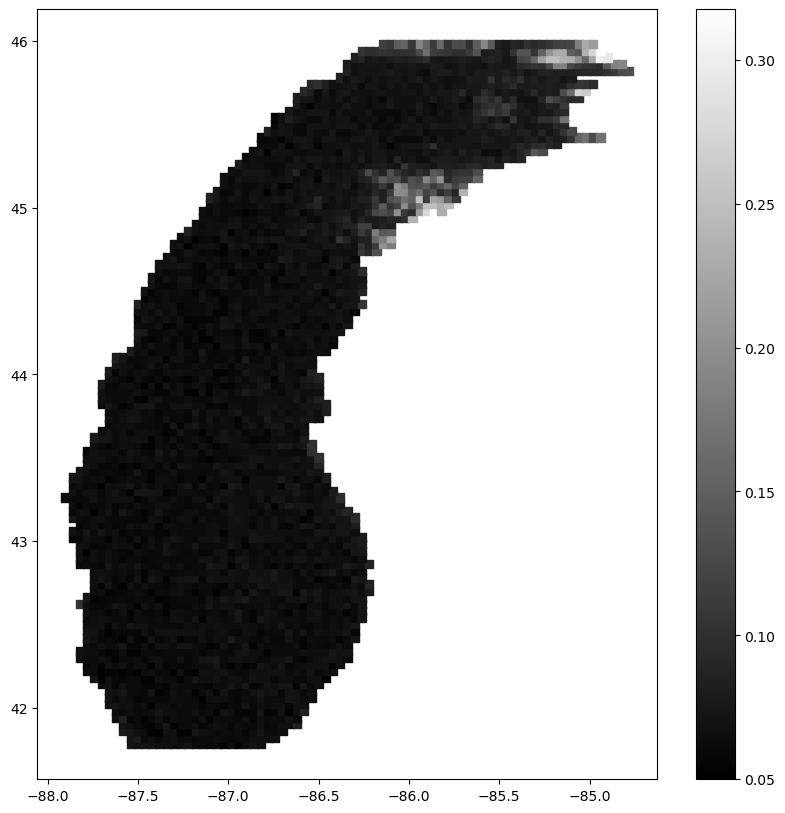

In [13]:
return_code = arrays_2_png(lat_lst, lon_lst, data_sample_lst, 'sample')
return_code

Note that completely white pixels (intensity of 1) delineate the shape of the lake. Do not mistake these pixels for clouds!!!

In the imagery data, pixels with close-to-zero intensities represent the absence of clouds, while pixels with intensities close to 1 indicate the presence of moisture-retaining clouds. It is important to distinguish between these two types of pixels when processing and analyzing the data, as they can have significant impacts on the resulting insights and predictions.

---

Due to the nature of imagery data generated from the visible band, the quality of the imagery can be affected by the availability of sunlight. In situations where there is not enough sunlight hitting the surface of the earth, the resulting imagery may suffer from **lower quality** or **loss of data**. It is important to take this into consideration when processing and analyzing the data.

<img src="https://i.imgur.com/0IWa4os.png" alt="image" width="75%">

For instance, the image shown above corresponds to the GOES satellite imagery data captured at 12:00 PM on December 8, 2016, in the Coordinated Universal Time (UTC) time zone. It would be 7:00 AM in Central Standard Time. When we look at the histogram of the data, we will find:

<img src="https://i.imgur.com/vj32fvZ.png" alt="image" width="75%">

It is important to note that the visible band imagery data generated by the GOES satellite sensor suffers when there is no sufficient sunlight hitting the earth's surface, which can result in a lack of valuable data for analysis. Therefore, it is recommended to focus on data from 14:00 UTC to 21:00 UTC, when there is enough sunlight to generate reflections and capture useful information. This time window provides valid data for the experiment and can be used to extract important insights from Lake Michigan and its surrounding areas.